# 생성한 텍스트 검증하기

## 1. 기존 노래 가사와의 유사성 : 참신할수록 유사성이 낮음

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
import numpy as np

# 가사 데이터 (예시)
scores = [0.95, 0.78]  # 완성도 점수 (가상의 타겟 값)

#생성 데이터 불러오기 
generated_text = """퇴근 후 나른한 오후에 느끼는 상반된 나의 감정, 쓸쓸함과 안락함,
괜찮아 저 먼 거리에 남아도 괜찮다고 말해준다던 네 마음 너와 나누었던 추억을 떠올려봐,
너에게로 달려온 하루가 어느새 다 지나가고 있구나?,
그대란 하늘 아래 혼자 서있는 듯해 어떤 모습일까 우린 아무렇지 않게 다가올 뿐이야,
널 향한 사랑 그 끝이 보이지 않는걸,
나는 그래왔던 걸까 ,
미련 없이 떠난 이 길이 익숙치 않아,
이제 더는 기다릴 수도 없어 너와 걷고 싶어서,
눈물만 흘러 내리는 차가운 곳에 널 안고 있어,
밤은 깊어질수록 느껴지는 내 맘 그대 그리워져,
차가운 밤길에 달빛마저 반짝이는데 ,
어두웠던 밤 끝에 함께했던 우리의 첫 만남 그 끝엔 어디쯤이야? 난 꼭 와줄게,
안녕, 우리 잠시라도 좋았었다면 다시 오고 싶은 여름밤,
다시 날 바라볼 수 있었다면 널 잊지 못할 거야. 안녕,
좋은 밤 좋은 날이 되길 바랬다면 한 번쯤 말하지만,
나를 보고 웃으며 고백하고픈 마음이니,
자꾸 미소 짓는 널 보기가 좋아해 준다면 차라리 가만히 있어도 돼 천천히 돌아와줘,
우리 함께 걸어보면 좋을 텐데,
더 빨리 가자고 말해주고 싶지만 또 두 손 맞잡았던 기억들 잊혀지는 않을래,
사랑스러운 인사들도 지워지는 것도 모두 다 떠나간 것처"""

# TF-IDF로 벡터화
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(generated_text).toarray()

# Ridge 회귀 모델 학습
model = Ridge(alpha=1.0)
model.fit(X, scores)

# 새로운 데이터 예측
new_generated_text = vectorizer.transform(generated_text).toarray()
predicted_score = model.predict(new_generated_text)
print("Predicted Score:", predicted_score)

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
data = pd.read_csv("/home/wanted-1/potenup-workspace/Project/project2/team5/1.데이터모음/'music_data(Merge)'.csv")

In [4]:
# 가사 컬럼의 가사 문자열로 
lyrics_data = data['lyrics'].dropna().tolist()

# 생성 가사 
generated_lyrics = '''
그날, 인류는 떠올렸다. 놈들에게 지배당해왔던 공포를... 새장 속에서 갇혀만 살았었던 굴욕을.... 
이제부터야 이해가 갔어
그대의 그 눈빛은
영원한 나의 꿈이었지 (That's make a boys)
마지막 순간에라도 너는 들어줘 (camera season in the way and I am holding without you go)
여긴 우리와 같은 곳이잖아...
우리만의 끝 없는 상상속에 빠져들어서 결국엔 사라져버려 난 다 잊고 있었죠  
새로운 세상이 더 이상 나를 괴롭히지 않게 제발 모든걸 주고 떠나가겠지만
그대와 다른 세상이 또 난 거기 있겠단 걸 알아요 그저 다 알았다면 살아왔기에 그렇게 괜찮았을까요 (We're come to laughterdah stuck?)
그래도 나보고 날 잊지 말자고 말한 만큼
잊었으면 좋겠다고 말하며 말을 해요
내게 말해주고 싶어요
정말 정말 많이 힘들었다고 해야 하는데 어떻게 네 기억을 전부 가져가고 지울 수 없냐구?
오해하지 마세요 내가 아직 더 알 텐데
하필 내일은 왜 그댈 보고 싶다고 했나봐요
지금 생각하면 힘이 드는데 이대로 멈춰서도 찾을 수가 없어

더는 안된다는 말야 하지만 지금 여기 남아있는 건 어쩌면 이 순간
네가 아무렇지가 않네요
'''
lyrics_data.append(generated_lyrics)

# 전처리 함수 
def preprocess_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\\n\s]', '', text)  # 특수문자 제거 
    return text.lower()

lyrics_datas = [preprocess_text(lyric) for lyric in lyrics_data]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lyrics_datas)

# 생성된 가사와 기존 가사의 코사인 유사도 계산
generated_lyrics_vector = tfidf_matrix[-1]  # 생성된 가사의 벡터 
# 생성된 가사의 벡터와 기존 가사들의 벡터 간 코사인 유사도를 계산. flatten() -> 결과를 1차원 배열로 변환.
cosine_similarities = cosine_similarity(generated_lyrics_vector, tfidf_matrix[:-1]).flatten() 

# 코사인 유사도가 높은 상위 20개의 기존 가사 선택
# argsort(): 코사인 유사도 배열을 정렬된 인덱스로 반환. 가장 작은 값부터 큰 값으로 정렬된 인덱스를 리턴.
# [-20:][::-1] -> 배열에서 상위 20개의 가사(인덱스)를 선택한 뒤 내림차순으로 정렬.
top_20_indices = cosine_similarities.argsort()[-20:][::-1]
top_20_similarities = [(index, cosine_similarities[index]) for index in top_20_indices]


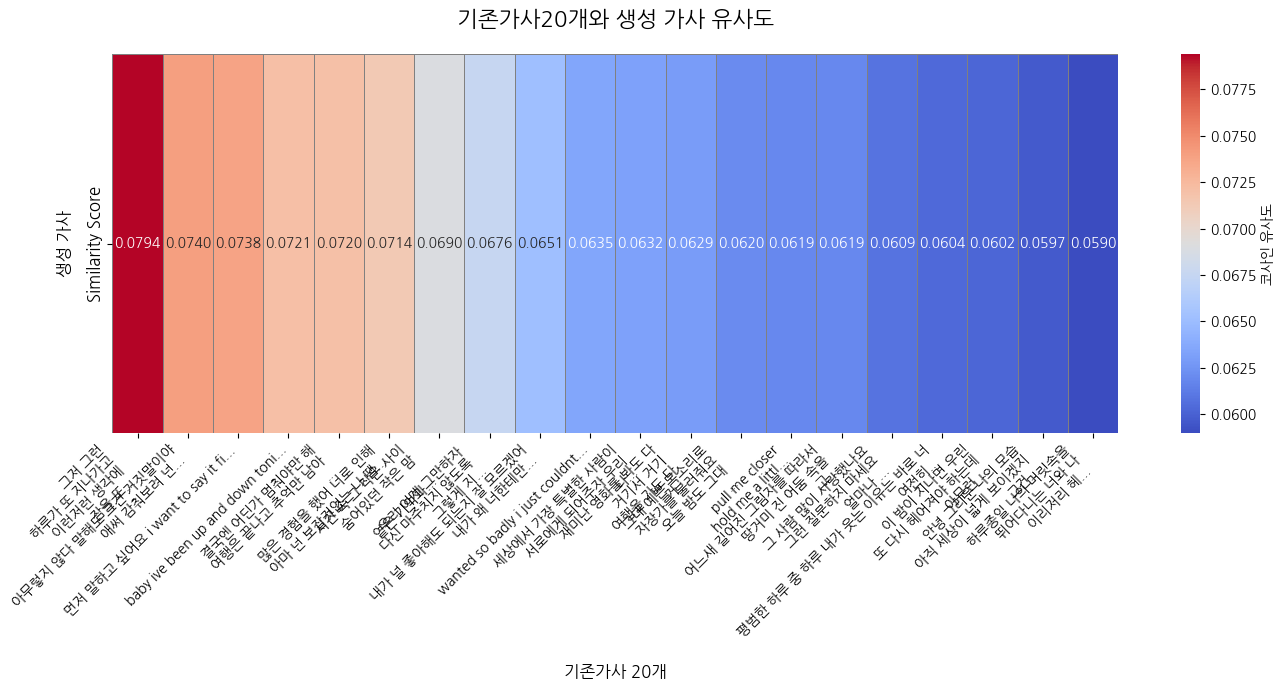

In [5]:
# 상위 20개 가사(인덱스)에 대한 가사의 처음 30개 문자 추출
top_20_lyrics = [
    preprocess_text(lyrics_data[index])[:30] + "..." for index, _ in top_20_similarities
]

# "Existing Lyrics Snippet": 기존 가사 요약본.
# "Similarity Score": 생성된 가사와 기존 가사의 유사도. 
heatmap_data = pd.DataFrame({
    "Existing Lyrics Snippet": top_20_lyrics,
    "Similarity Score": [score for _, score in top_20_similarities]
})

# 히트맵에 적합한 형태로 데이터를 재구조화.
# .T: -> 행과 열을 전치하여 히트맵에 적합한 형식으로 변환:
# 열: 기존 가사 요약본.
# 행: 유사도 점수. 
heatmap_matrix = heatmap_data.set_index("Existing Lyrics Snippet").T

# 히트맵을 생성하여 생성된 가사와 기존 가사 간의 유사도를 시각화.
plt.figure(figsize=(14, 7))
sns.heatmap(
    heatmap_matrix,
    annot=True, # 셀 내부에 유사도 값을 표시.
    fmt=".4f",  # 유사도 점수를 소수점 네 자리로 표시
    cmap="coolwarm",  # 색상 맵을 coolwarm으로 설정 (높은 유사도는 붉은색, 낮은 유사도는 파란색).
    cbar_kws={'label': '코사인 유사도'},
    linewidths=0.5,  # 셀 사이에 0.5 두께의 구분선을 추가. 
    linecolor='gray'  # 셀 구분선 색상을 회색으로 설정
)

# 그래프에 제목과 축 레이블 추가
plt.title("기존가사20개와 생성 가사 유사도", fontsize=16, pad=20)
plt.xlabel("기존가사 20개", fontsize=12, labelpad=10)
plt.ylabel("생성 가사", fontsize=12, labelpad=10)

# 축 레이블이 겹치지 않도록 조정.
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## 2. 언어적 특성 : 문법 구조의 정확성 검증

문법적 정확성 점수: 1.00


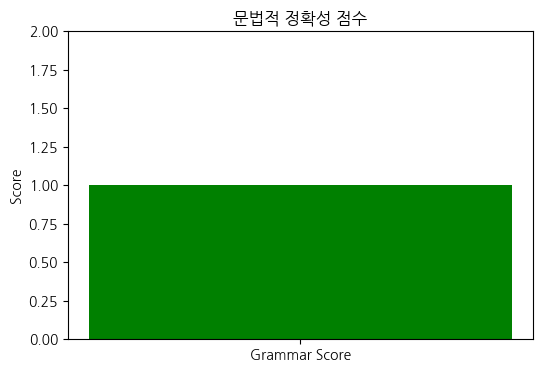

In [8]:
from konlpy.tag import Komoran

# Komoran 초기화
komoran = Komoran()


# 전처리 함수
def preprocess(text):
    if isinstance(text, str):
        text = re.sub(r'\n\s+', '\n', text, flags=re.MULTILINE)  # 불필요한 줄바꿈 제거
        text = re.sub(r'[^가-힣a-zA-Z0-9\s+]', '', text)  # 한글, 영문, 숫자 남김
        text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백 제거
    return text


# 생성된 가사
generated_lyrics = '''
그날, 인류는 떠올렸다. 놈들에게 지배당해왔던 공포를... 새장 속에서 갇혀만 살았었던 굴욕을.... 
이제부터야 이해가 갔어
그대의 그 눈빛은
영원한 나의 꿈이었지 (That's make a boys)
마지막 순간에라도 너는 들어줘 (camera season in the way and I am holding without you go)
여긴 우리와 같은 곳이잖아...
우리만의 끝 없는 상상속에 빠져들어서 결국엔 사라져버려 난 다 잊고 있었죠  
새로운 세상이 더 이상 나를 괴롭히지 않게 제발 모든걸 주고 떠나가겠지만
그대와 다른 세상이 또 난 거기 있겠단 걸 알아요 그저 다 알았다면 살아왔기에 그렇게 괜찮았을까요 (We're come to laughterdah stuck?)
그래도 나보고 날 잊지 말자고 말한 만큼
잊었으면 좋겠다고 말하며 말을 해요
내게 말해주고 싶어요
정말 정말 많이 힘들었다고 해야 하는데 어떻게 네 기억을 전부 가져가고 지울 수 없냐구?
오해하지 마세요 내가 아직 더 알 텐데
하필 내일은 왜 그댈 보고 싶다고 했나봐요
지금 생각하면 힘이 드는데 이대로 멈춰서도 찾을 수가 없어

더는 안된다는 말야 하지만 지금 여기 남아있는 건 어쩌면 이 순간
네가 아무렇지가 않네요
'''


#  전처리 적용
final_lyrics= preprocess(generated_lyrics)

# 특정 패턴이 tags 리스트에 순서를 유지한 채 존재하는지 확인하는 함수.
def is_subsequence(pattern, tags):
    it = iter(tags)
    return all(tag in it for tag in pattern)

def grammar_check(text):
    # total_structures: 전체 문장 개수 (분석한 모든 문장의 개수)
    # correct_structures: 문법적으로 올바른 구조를 가진 문장의 개수
    total_structures = 0
    correct_structures = 0

    # 줄 바꿈 기준으로 문장 분리
    sentences = text.split('\n')

    # 문장의 문법 구조를 분석하기 위해 정확한 문법 패턴 정의(태그 순서 포함)
    patterns = [
        ['NP', 'JKS', 'NP', 'JKO', 'VV'],  # 주어 + 목적어 + 서술어
        ['NP', 'JKS', 'NP', 'JKC', 'VV'],  # 주어 + 보어 + 서술어
        ['NP', 'JKS', 'MAG', 'VV'],        # 주어 + 서술어 + 부사어
        ['NP', 'JKS', 'MAG', 'NP', 'JKO', 'VV'],  # 주어 + 부사어 + 목적어 + 서술어
        ['NP', 'JKS', 'NP', 'JKB', 'VV'],  # 주어 + 서술어 + 보충어구
        ['NP', 'JX', 'NP', 'JKO', 'VV'],   # 보조사 사용 문장
        ['NP', 'JKS', 'VA'],               # 주어 + 형용사
        ['NP', 'JKS', 'VX', 'EP'],         # 주어 + 보조동사 (예: "나는 할 수 있다")
        ['NP', 'JKS', 'VV', 'EC', 'NP', 'JKO', 'VV'],  # 종속절 포함 문장 (예: "나는 먹고 공부했다")
        ['NP', 'JKS', 'NP', 'JKB', 'MAG', 'VV']  # 주어 + 보충어구 + 부사어 + 서술어
    ]

    for sentence in sentences:
        if not sentence.strip():   # 공백만 있는 문장은 건너뜀
            continue
        
        tags = [tag for _, tag in komoran.pos(sentence)]  # 문장 분석 후 태그(품사)만 tags 리스트 저장
        total_structures += 1  # 문장을 분석했으므로 total_structures 값을 1 증가

        # patterns 리스트에 저장된 문법 패턴을 하나씩 가져와 현재 문장의 tags 리스트와 비교
        for pattern in patterns:
            # pattern의 모든 품사가 tags 안에 존재하는지 확인
            # 모든 품사가 tags 안에 존재하면 True를 반환
            if is_subsequence(pattern, tags):  # 순서를 고려한 검사
                correct_structures += 1
                break  # 한 번 맞으면 추가 검사는 불필요

    # 문법적으로 올바른 문장의 비율을 계산
    return correct_structures / total_structures if total_structures > 0 else 0

grammar_score = grammar_check(final_lyrics)
print(f"문법적 정확성 점수: {grammar_score:.2f}")

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(['Grammar Score'], [grammar_score], color='green')
plt.ylim(0, 2)
plt.title('문법적 정확성 점수')
plt.ylabel('Score')
plt.show()